In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Define the CNN architecture
def cnn_model(input_shape):
    model = tf.keras.models.Sequential([
        # Convolutional Layer 1
        tf.keras.layers.Conv2D(filters=8, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape),
        # Pooling Layer 1
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
        # Convolutional Layer 2
        tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation='relu'),
        # Pooling Layer 2
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
        # Flatten layer
        tf.keras.layers.Flatten(),
        # Fully Connected Layer 1
        tf.keras.layers.Dense(120, activation='relu'),
        # Fully Connected Layer 2
        tf.keras.layers.Dense(84, activation='relu'),
        # Output Layer
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Function to display the output of each layer
def visualize_layers(model, input_image):
    # Reshape input image for compatibility with the model
    input_image = np.expand_dims(input_image, axis=0)
    layer_outputs = [layer.output for layer in model.layers] # Extracts the outputs of the top 10 layers
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

    # Get the activations for each layer
    activations = activation_model.predict(input_image)

    # Visualize each layer's output
    for i, activation in enumerate(activations):
        plt.figure()
        if activation.ndim == 4:
            plt.matshow(activation[0, :, :, 0], cmap='viridis')
        elif activation.ndim == 2:
            plt.matshow(activation.reshape(1, -1), cmap='viridis')
        plt.title("Layer {} Output".format(i+1))
        plt.show()


1/1 [==============================] - 0s 142ms/step


<Figure size 640x480 with 0 Axes>

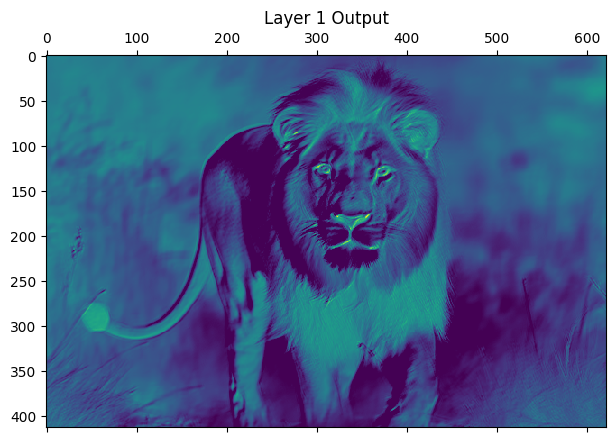

<Figure size 640x480 with 0 Axes>

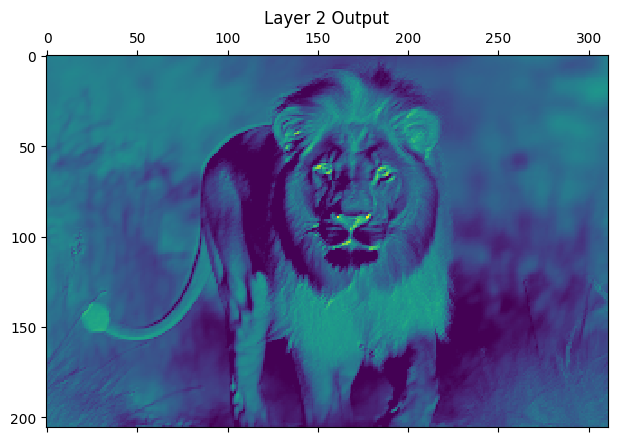

<Figure size 640x480 with 0 Axes>

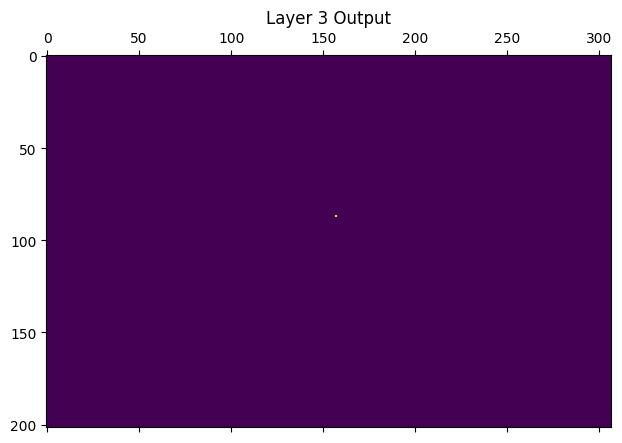

<Figure size 640x480 with 0 Axes>

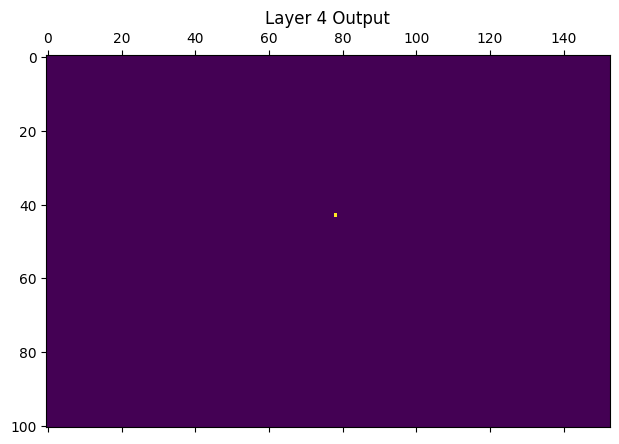

<Figure size 640x480 with 0 Axes>

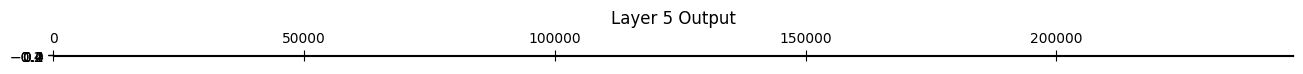

<Figure size 640x480 with 0 Axes>

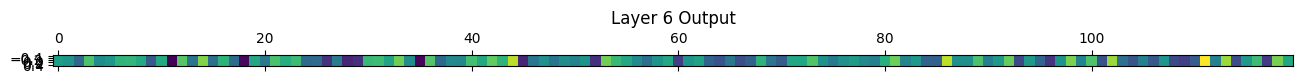

<Figure size 640x480 with 0 Axes>

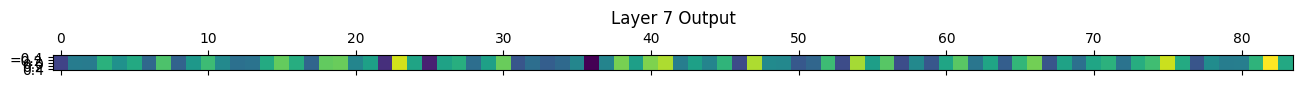

<Figure size 640x480 with 0 Axes>

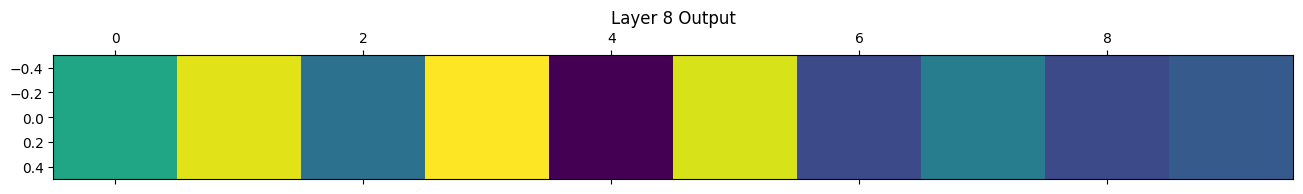

In [4]:

# Read input image
input_image = plt.imread('lion.png')

# Define input shape for the model
input_shape = input_image.shape

# Create the model
model = cnn_model(input_shape)

# Display the output of each layer
visualize_layers(model, input_image)
